<a href="https://colab.research.google.com/github/dprobity/machinelearning/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook Imports and Packages


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

$$f(x) = x^2 + x + 1$$


In [61]:
def f(x):
    return x**2 + x**1 + 1

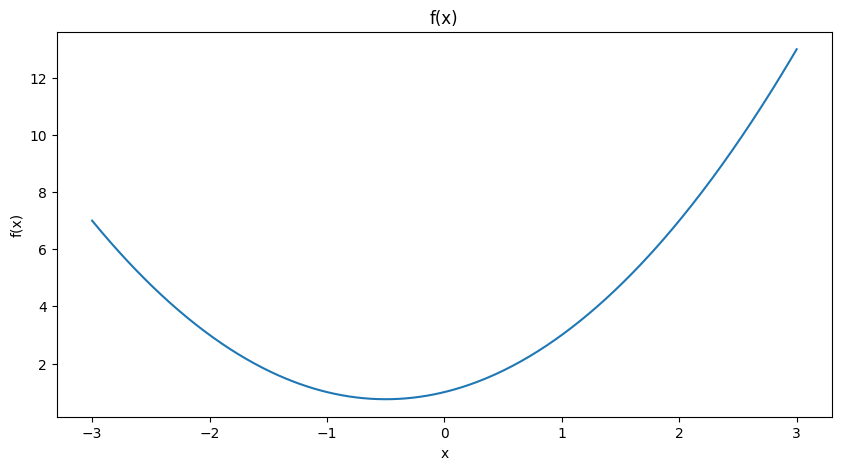

In [62]:
x_1 = np.linspace(start=-3, stop=3, num=500)

plt.figure(figsize=(10, 5))
# plt.scatter(x_1, f(x_1))
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

In [63]:
def slope(x):
  return 2*x + 1


slope(2)

5

# $d(x^n)/dx = n.x^n-1$

Plot the function and the derivative side by side


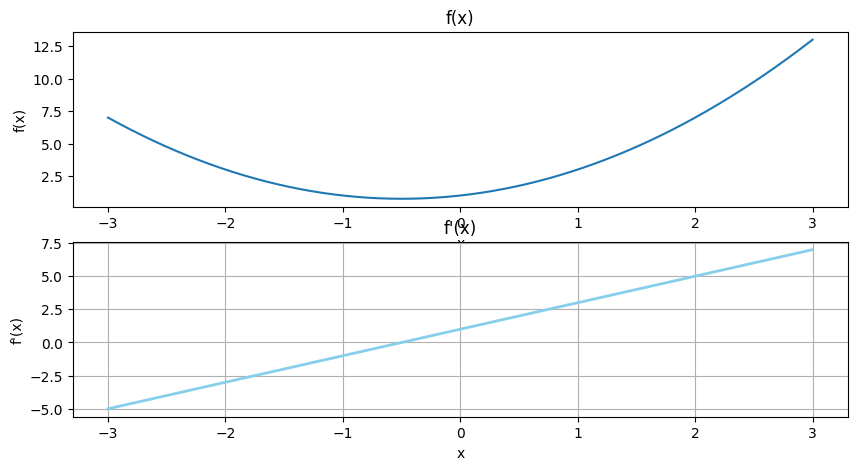

In [64]:
x_1 = np.linspace(start=-3, stop=3, num=500)

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
# plt.scatter(x_1, f(x_1))
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_1, f(x_1))

plt.subplot(2, 1, 2)
plt.title("f'(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.plot(x_1, slope(x_1), c='skyblue', linewidth=2)
plt.grid()
plt.show()

## Python loops & Gradient Descent

In [65]:
# python Loop


for n in range(5):
  print('Hello World', n)
  print(n**2)
print('End loop')

Hello World 0
0
Hello World 1
1
Hello World 2
4
Hello World 3
9
Hello World 4
16
End loop


In [66]:
# python while loop

countter = 0

while countter < 5:
  print('Hello World', countter)
  print(countter**2)
  countter += 1
print('End of waiting tine Ready or not, here I come')

Hello World 0
0
Hello World 1
1
Hello World 2
4
Hello World 3
9
Hello World 4
16
End of waiting tine Ready or not, here I come


# Gradient Decsent


In [67]:
import numpy as np

def f(x):
    x=np.array(x)
    return x**2 + x + 1



def df(x):
  x=np.array(x)
  return 2*x + 1




In [68]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
max_iterations = 170
precision = 0.0001
step_size = abs(new_x - previous_x)


x_lst = []
slope_lst = []
cost_lst = []


for n in range(max_iterations):
  previous_x = new_x
  gradient = df(previous_x)
  new_x = previous_x - step_multiplier * df(previous_x)
  x_lst.append(new_x)
  slope_lst.append(gradient)
  cost_lst.append(f(new_x))
  step_size = abs(new_x - previous_x)
  #print(n, "...............",step_size)

  if step_size < precision:
    break


print(n, step_size)

print('Local minimum occurs at x:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

40 9.304595970494045e-05
Local minimum occurs at x: -0.49962781616118024
Slope or df(x) value at this point is: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


#Superimpose the gradient descent chart

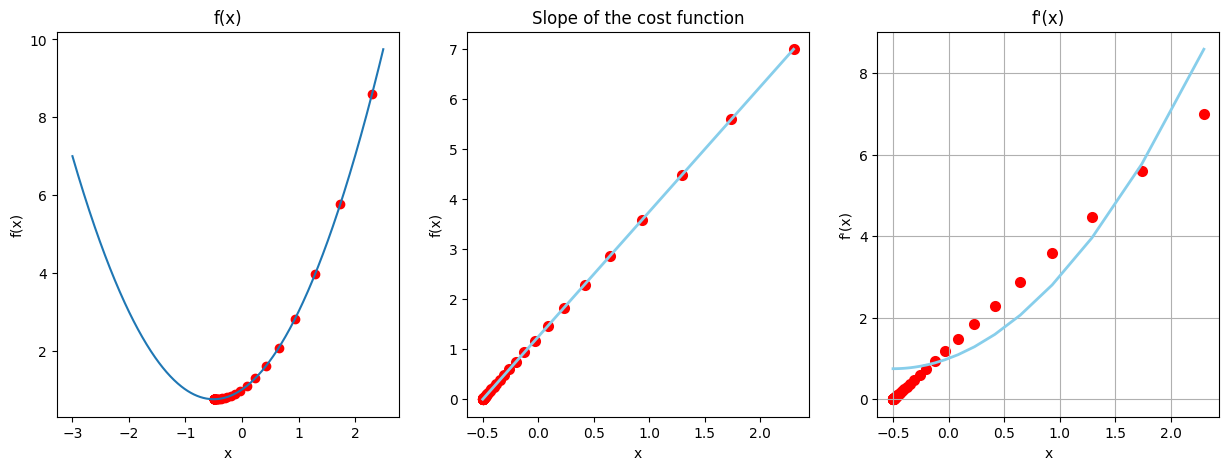

In [69]:
x_plot = np.linspace(start=-3, stop=2.5, num=500)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# plt.scatter(x_1, f(x_1))
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_plot, f(x_plot))
plt.scatter(x_lst,cost_lst, alpha=1, c='r')



plt.subplot(1, 3, 2)
# plt.scatter(x_1, f(x_1))
plt.title("Slope of the cost function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_lst,slope_lst, c='skyblue', linewidth=2)
plt.scatter(x_lst,slope_lst, c='r', linewidth=2, alpha=1)


plt.subplot(1, 3, 3)
plt.title("f'(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.plot(x_lst,cost_lst, c='skyblue', linewidth=2)
plt.scatter(x_lst,slope_lst, c='r', linewidth=2, alpha=1)

plt.grid()
plt.show()

# Example 2 - Multiple Minima vs Initial Guesses & Advanced functions

##$$
g(x) = x^4 - 4x^2 + 5$$

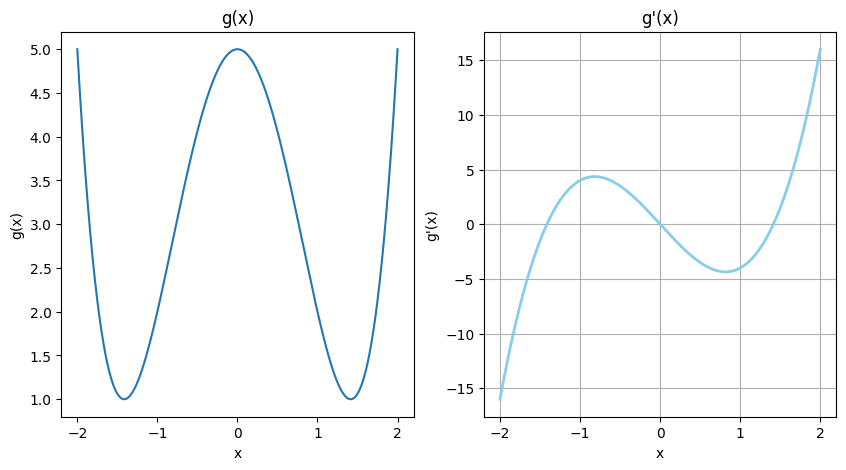

In [82]:
# Make some data

x_2 = np.linspace(-2,2,1000)


def g(x):
  x=np.array(x)
  return x**4 - 4*x**2 + 5

def dg(x):
  x=np.array(x)
  return 4*x**3 - 8*x




plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("g(x)")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.plot(x_2, g(x_2))


plt.subplot(1, 2, 2)
plt.title("g'(x)")
plt.xlabel("x")
plt.ylabel("g'(x)")
plt.plot(x_2, dg(x_2), c='skyblue', linewidth=2)
plt.grid()
plt.show()


##Gradient Descent as a Python Function

In [71]:
def gradient_descent(derivative_func, initial_guess, step_multiplier, precision, max_iterations):
      new_x = initial_guess
      x_lst = [new_x]
      slope_lst = [derivative_func(new_x)]

      for n in range(max_iterations):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - step_multiplier * gradient
        x_lst.append(new_x)
        slope_lst.append(gradient)
        step_size = abs(new_x - previous_x)
        #print(n, "...............",step_size)

        if step_size < precision:
          break

      return new_x, x_lst, slope_lst

local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001, 500)
print('Local minimum occurs at x:', local_min)
print('Slope or df(x) value at this point is:', dg(local_min))
print('f(x) value or cost at this point is:', g(local_min))
print('Number of steps:', len(list_x))

Local minimum occurs at x: 1.4122375085019094
Slope or df(x) value at this point is: -0.03155062633818417
f(x) value or cost at this point is: 1.00003119467776
Number of steps: 23


In [72]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-.1, step_multiplier=0.02, precision=0.001, max_iterations=500)
print('Local minimum occurs at x:', local_min)
print('Slope or df(x) value at this point is:', dg(local_min))
print('f(x) value or cost at this point is:', g(local_min))
print('Number of steps:', len(list_x))

Local minimum occurs at x: -1.4120887490901561
Slope or df(x) value at this point is: 0.03392043166866365
f(x) value or cost at this point is: 1.000036064405096
Number of steps: 34


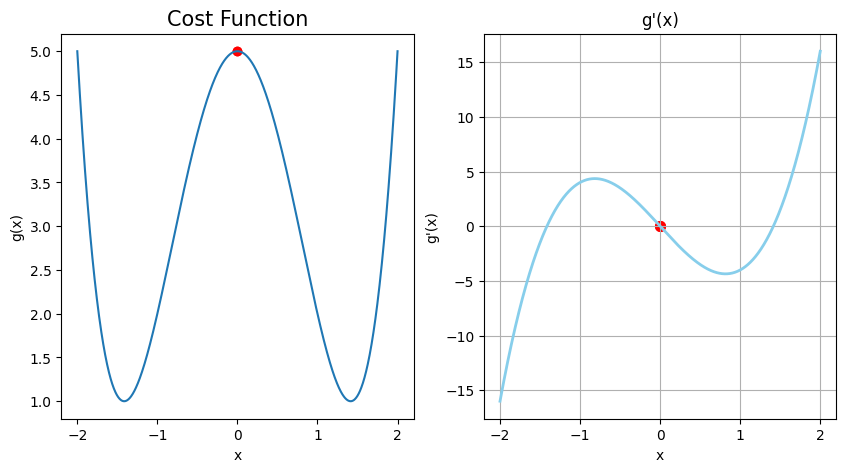

In [73]:
# Calling gradient descent function
# the optimal solutiond epends on the initial_guess and if you completly guess range out of the local global minima, be sure never to land on the global minima, what we can do is to have an array of initial guess to systematically explore --this is technically a random search ir stochastic gradient descent implementation

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0, step_multiplier=0.02, precision=0.001, max_iterations=500)

# Plot function and derivatives and scatter plot side by side



plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Cost Function", fontsize=15)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(list_x), c='r')


plt.subplot(1, 2, 2)
plt.title("g'(x)")
plt.xlabel("x")
plt.ylabel("g'(x)")
plt.plot(x_2, dg(x_2), c='skyblue', linewidth=2)
plt.scatter(list_x, deriv_list, c='r', linewidth=2, alpha=1)
plt.grid()
plt.show()

#Example 3 - Divergence, Overflow and Python Tuples

##$$h(x) = x^5 - 2x^4 + 2$$

In [74]:
# Make data

x_3 = np.linspace(start=-2.5,stop=2.5, num=1000)

def h(x):
  x=np.array(x)
  return x**5 - 2*x**4 + 2

def dh(x):
  x=np.array(x)
  return 5*x**4 - 8*x**3




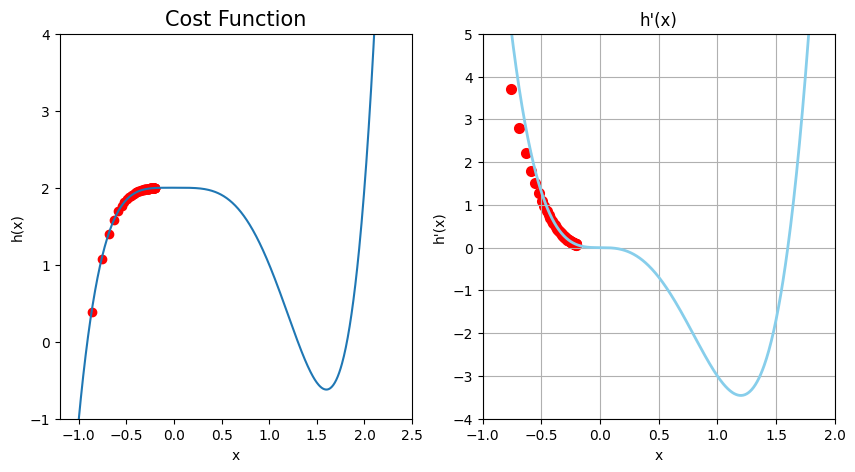

Local minimum occurs at x: -2071072.4470816324
Slope or df(x) value at this point is: 9.199230561666396e+25
f(x) value or cost at this point is: -3.810455326061589e+31
Number of steps: 71


In [75]:
# Calling gradient descent function
# the optimal solutiond epends on the initial_guess and if you completly guess range out of the local global minima, be sure never to land on the global minima, what we can do is to have an array of initial guess to systematically explore --this is technically a random search ir stochastic gradient descent implementation

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, step_multiplier=0.02, precision=0.001, max_iterations=70)

# Plot function and derivatives and scatter plot side by side



plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Cost Function", fontsize=15)
plt.xlabel("x")
plt.ylabel("h(x)")
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.plot(x_3, h(x_3))
plt.scatter(list_x, h(list_x), c='r')


plt.subplot(1, 2, 2)
plt.title("h'(x)")
plt.xlabel("x")
plt.ylabel("h'(x)")
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.plot(x_3, dh(x_3), c='skyblue', linewidth=2)
plt.scatter(list_x, deriv_list, c='r', linewidth=2, alpha=1)
plt.grid()
plt.show()


print('Local minimum occurs at x:', local_min)
print('Slope or df(x) value at this point is:', dh(local_min))
print('f(x) value or cost at this point is:', h(local_min))
print('Number of steps:', len(list_x))

In [76]:
import sys
sys.version

sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

##Python Tuples

In [77]:
# Creating a tuple

breakfast = 'bacon', 'egg', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

#breakfast[0] = 'sausage'

type(breakfast)

tuple

##The Learning Rate

##i.e the step_multiplier variable, try to vary the lr and and the max iterations to see how wierd the solution will behave when you run it @ 500 iters and the lr of 0.25, the model never converges but with a good lr 0f 0.02 and within 14 iters the model converges


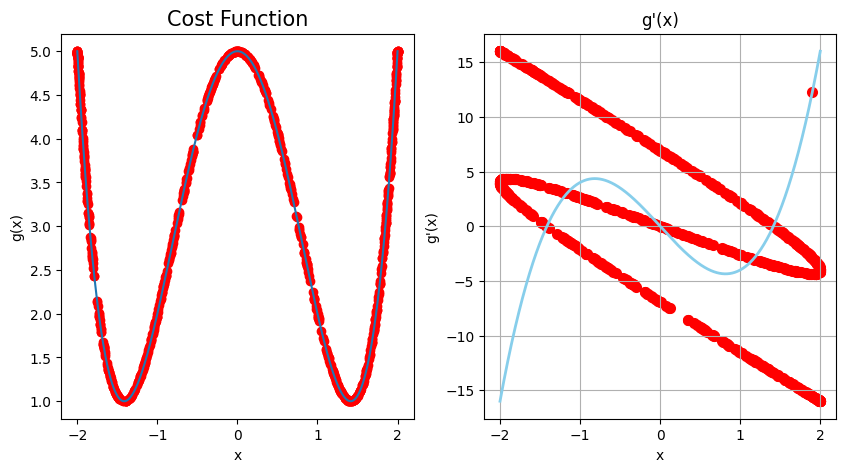

Number of steps at this point is 792


In [78]:
#Calling gradient descent function
# the optimal solutiond epends on the initial_guess and if you completly guess range out of the local global minima, be sure never to land on the global minima, what we can do is to have an array of initial guess to systematically explore --this is technically a random search ir stochastic gradient descent implementation

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, step_multiplier=0.25, precision=0.001, max_iterations=5000)

# Plot function and derivatives and scatter plot side by side



plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Cost Function", fontsize=15)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(list_x), c='r')


plt.subplot(1, 2, 2)
plt.title("g'(x)")
plt.xlabel("x")
plt.ylabel("g'(x)")
plt.plot(x_2, dg(x_2), c='skyblue', linewidth=2)
plt.scatter(list_x, deriv_list, c='r', linewidth=2, alpha=1)
plt.grid()
plt.show()


print('Number of steps at this point is', len(list_x))

<ipython-input-70-401491454>:12: RuntimeWarning: overflow encountered in power
  return 4*x**3 - 8*x
<ipython-input-70-401491454>:12: RuntimeWarning: invalid value encountered in scalar subtract
  return 4*x**3 - 8*x
<ipython-input-70-401491454>:8: RuntimeWarning: overflow encountered in power
  return x**4 - 4*x**2 + 5
<ipython-input-70-401491454>:8: RuntimeWarning: overflow encountered in square
  return x**4 - 4*x**2 + 5
<ipython-input-70-401491454>:8: RuntimeWarning: invalid value encountered in subtract
  return x**4 - 4*x**2 + 5


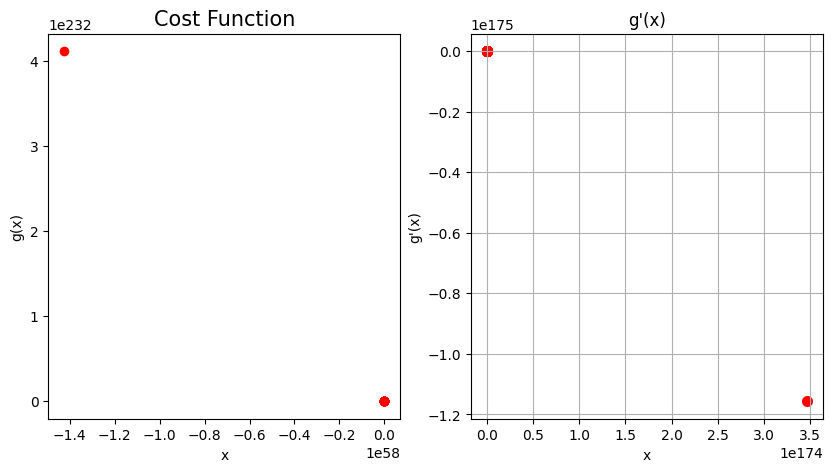

Number of steps at this point is 501


In [79]:
#Calling gradient descent function
# the optimal solutiond epends on the initial_guess and if you completly guess range out of the local global minima, be sure never to land on the global minima, what we can do is to have an array of initial guess to systematically explore --this is technically a random search ir stochastic gradient descent implementation

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, step_multiplier=0.3, precision=0.001, max_iterations=500)

# Plot function and derivatives and scatter plot side by side



plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Cost Function", fontsize=15)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(list_x), c='r')


plt.subplot(1, 2, 2)
plt.title("g'(x)")
plt.xlabel("x")
plt.ylabel("g'(x)")
plt.plot(x_2, dg(x_2), c='skyblue', linewidth=2)
plt.scatter(list_x, deriv_list, c='r', linewidth=2, alpha=1)
plt.grid()
plt.show()


print('Number of steps at this point is', len(list_x))

In [80]:
print('Local minimum occurs at x:', local_min)
print('Slope or df(x) value at this point is:', dg(local_min))
print('f(x) value or cost at this point is:', g(local_min))

Local minimum occurs at x: nan
Slope or df(x) value at this point is: nan
f(x) value or cost at this point is: nan


low_ values 101 [3, np.float64(2.958), np.float64(2.9180683961760003), np.float64(2.8800452461674326), np.float64(2.8437874313778595), np.float64(2.8091664411229798), np.float64(2.7760665043594512), np.float64(2.7443830061854295), np.float64(2.7140211390737248), np.float64(2.684894748698115), np.float64(2.656925341946347), np.float64(2.630041230797198), np.float64(2.604176790557754), np.float64(2.5792718147981915), np.float64(2.555270952401693), np.float64(2.532123214631493), np.float64(2.5097815421316145), np.float64(2.4882024234199407), np.float64(2.467345557777215), np.float64(2.447173556542411), np.float64(2.4276516777397608), np.float64(2.408747589722185), np.float64(2.3904311601488444), np.float64(2.3726742671441694), np.float64(2.355450629930521), np.float64(2.338735656601556), np.float64(2.3225063070204377), np.float64(2.306740969096069), np.float64(2.291419346919548), np.float64(2.276522359438565), np.float64(2.2620320485149046), np.float64(2.247931495353975), np.float64(2.234

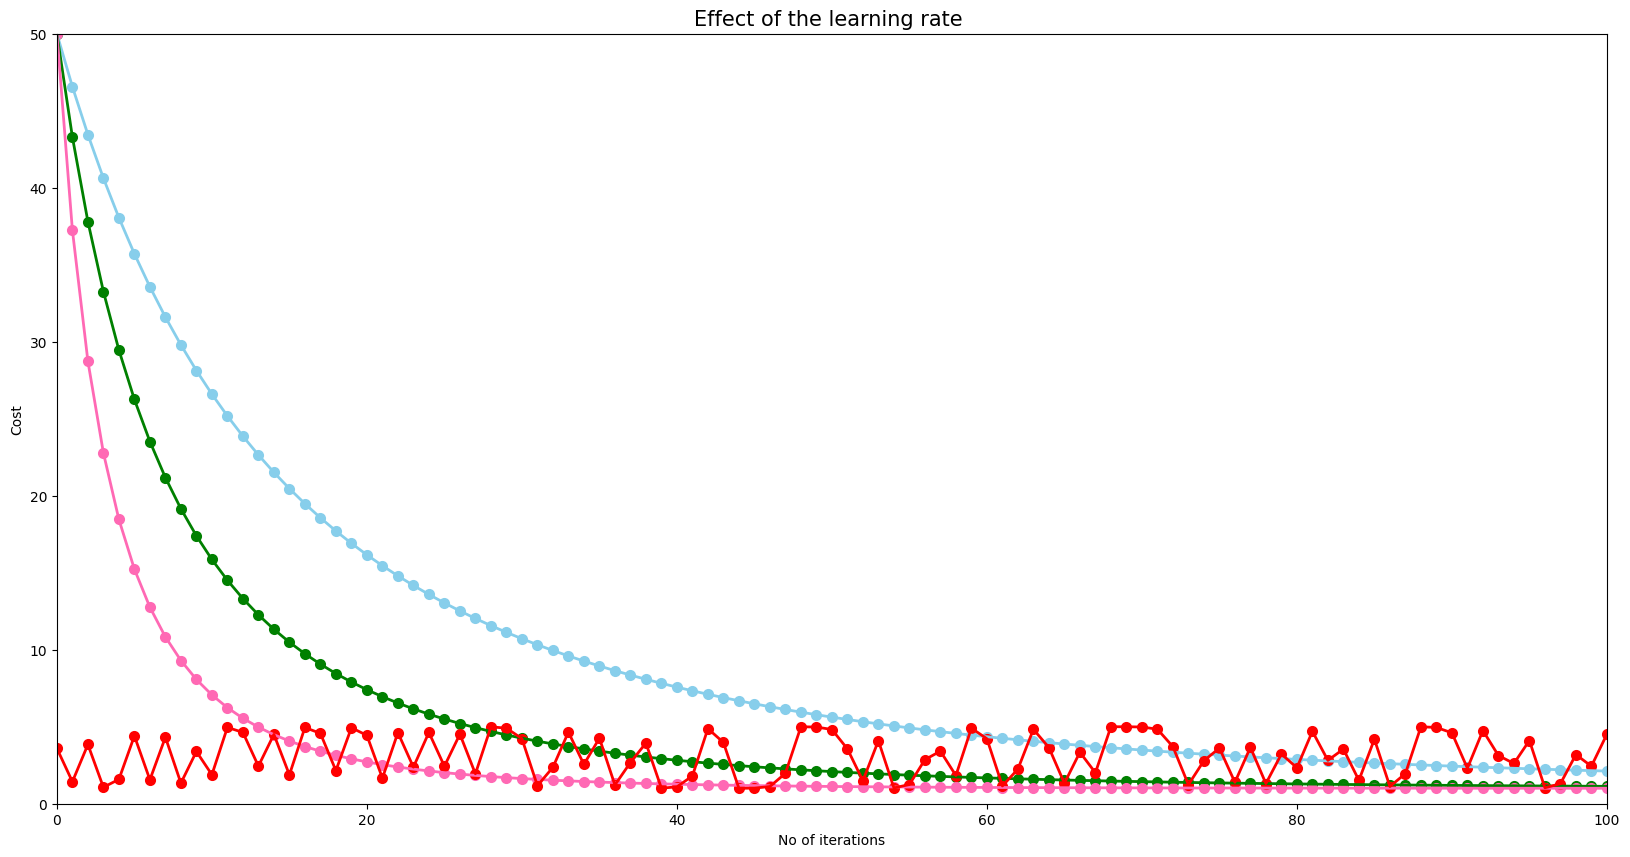

In [121]:
# Run gradient descent 3 times

n = 100

# the optimal solutiond epends on the initial_guess and if you completly guess range out of the local global minima, be sure never to land on the global minima, what we can do is to have an array of initial guess to systematically explore --this is technically a random search ir stochastic gradient descent implementation

low_gamma = local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=3, step_multiplier=0.0005, precision=0.0001, max_iterations= n)

mid_gamma = local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=3, step_multiplier=0.001, precision=0.0001, max_iterations= n)

high_gamma = local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=3, step_multiplier=0.002, precision=0.0001, max_iterations= n)

insane_gamma = local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, step_multiplier=0.25, precision=0.0001, max_iterations= n)






# Plot function and derivatives and scatter plot side by side



# Plotting reduction in cost for each iteration

plt.figure(figsize=(20, 10))

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title("Effect of the learning rate ", fontsize=15)
plt.xlabel("No of iterations")
plt.ylabel("Cost")



# Charting low Leraning rate
# Values for our chart
# Y values
low_values = low_gamma[1]
print("low_ values", len(low_values), low_values)
# X values
iteration_list = list(range(0, (len(low_values))))


print("iteration_values are:", iteration_list)


print("this is list x", list_x)




plt.plot(iteration_list, g(np.array(low_values)), c='skyblue', linewidth=2)
plt.scatter(iteration_list, g(np.array(low_values)), c='skyblue', linewidth=2)


# Charting mid learning rate
# Values for our chart
# Y values
mid_values = mid_gamma[1]
# X values
iteration_list2 = list(range(0, len(mid_values)))


plt.plot(iteration_list2, g(np.array(mid_values)), c='g', linewidth=2)
plt.scatter(iteration_list2, g(np.array(mid_values)), c='g', linewidth=2)




# Charting high learning rate

# Values for our chart
# Y values
high_values = high_gamma[1]
# X values
iteration_list3 = list(range(0, len(high_values)))
plt.plot(iteration_list3, g(np.array(high_values)), c='hotpink', linewidth=2)
plt.scatter(iteration_list3, g(np.array(high_values)), c='hotpink', linewidth=2)

# plt.scatter(list_x, g(np.array(list_x)), c='r', linewidth=2, alpha=1)


# Charting insanely high learning rate

# Values for our chart
# Y values
insane_values = insane_gamma[1]
# X values
iteration_list4 = list(range(0, len(insane_values)))
plt.plot(iteration_list4, g(np.array(insane_values)), c='red', linewidth=2)
plt.scatter(iteration_list4, g(np.array(insane_values)), c='red', linewidth=2)


# plt.grid()
# plt.show()


print('Number of steps at this point is', len(list_x))